## 선형회귀 구현


### 1.자동미분
* tensorflow의 tape_gradient()는 자동 미분 기능을 수행함
* 2w^2 + 5 식을 w에 대해 미분해보자

* tensorflow 변수
  * tf.Variable(value, name, dtype, shape) 메소드 사용
  * 변수의 값을 변경할 때는 assign() 메소드 사용


In [1]:
import tensorflow as tf

w=tf.Variable(2.) #실수형 2.0을 명시한 변수

def f(w):
  y=w**2
  z=2*y + 5
  return z

* tf.GradientTape
  * tensorflow에서 자동 미분을 위해 제공하는 api
  * tape은 이 컨텍스트 안에서 실행되는 연산을 기록함. 이후 tape.gradient()를 사용해 변수에 대한 기울기를 계산할 수 있음

* 블록 구조
  * with tf.GradientTape() as tape:
    * 이 문장은 'tape'라는 이름의 'tf.GradientTape' 객체를 생성하고 이 블록 안에서 실행되는 모듬 연산을 기록하도록 함
  * z=f(w)
    * w를 입력으로 하는 함수 'f'를 계산하여 결과를 'z'에 저장함


In [19]:
with tf.GradientTape() as tape:
  z=f(w)

#여기서 w가 배열로 들어간 이유는 tf.GradientTape.gradient 메서드가 여러 변수에
# 대한 기울기를 동시에 계산하고 반환 가능하기 때문
gradients=tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=16.0>]


### 2.자동미분을 이용한 선형회귀 구현

In [12]:
# 가중치 선언
w=tf.Variable(4.0)
b=tf.Variable(1.0)

#가설 함수로 정의
@tf.function
def hypothesis(x):
  return w*x+b

In [13]:
# 예시
x_test=[3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy()) # tensorflow의 tensor 구조를 nupmy로 변환함
print(hypothesis(x_test))

[15. 21. 23. 25.]
tf.Tensor([15. 21. 23. 25.], shape=(4,), dtype=float32)


In [14]:
#MSE 손실함수 정의
@tf.function
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred-y))

#옵티마이저 -> 경사하강법 사용 (학습률은 0.01)
optimizer=tf.optimizers.SGD(0.01)

In [15]:
#데이터 소개
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [23]:
#경사하강법 수행(epoch=300)
for i in range(301):
  with tf.GradientTape() as tape:
    y_pred=hypothesis(x) #예측값
    loss=mse_loss(y_pred, y) #mse오차 계산

  gradients = tape.gradient(loss, [w, b]) #손실함수에 대한 파라미터의 미분값 계산
  optimizer.apply_gradients(zip(gradients, [w,b])) #파라미터 업데이트

  # w,b값이 계속 업데이트 되면서 loss가 줄어드는걸 확인 할 수 있음
  if i%10==0:
    print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | loss : {:5.6f}".format(i, w.numpy(), b.numpy(), loss))

epoch :   0 | w의 값 : 10.6271 | b의 값 : 1.159 | loss : 1.086422
epoch :  10 | w의 값 : 10.6294 | b의 값 : 1.145 | loss : 1.084326
epoch :  20 | w의 값 : 10.6316 | b의 값 : 1.131 | loss : 1.082394
epoch :  30 | w의 값 : 10.6337 | b의 값 : 1.118 | loss : 1.080612
epoch :  40 | w의 값 : 10.6357 | b의 값 : 1.105 | loss : 1.078975
epoch :  50 | w의 값 : 10.6376 | b의 값 : 1.093 | loss : 1.077464
epoch :  60 | w의 값 : 10.6394 | b의 값 : 1.082 | loss : 1.076078
epoch :  70 | w의 값 : 10.6412 | b의 값 : 1.071 | loss : 1.074798
epoch :  80 | w의 값 : 10.6429 | b의 값 :  1.06 | loss : 1.073615
epoch :  90 | w의 값 : 10.6445 | b의 값 :  1.05 | loss : 1.072532
epoch : 100 | w의 값 : 10.6461 | b의 값 :  1.04 | loss : 1.071532
epoch : 110 | w의 값 : 10.6476 | b의 값 :  1.03 | loss : 1.070612
epoch : 120 | w의 값 : 10.6490 | b의 값 : 1.021 | loss : 1.069761
epoch : 130 | w의 값 : 10.6504 | b의 값 : 1.013 | loss : 1.068979
epoch : 140 | w의 값 : 10.6517 | b의 값 : 1.004 | loss : 1.068262
epoch : 150 | w의 값 : 10.6530 | b의 값 : 0.9963 | loss : 1.067602
epoch :

In [25]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy()) # 입력에 대한 예측값 -> 시간이 많아질수록 성적도 높아지고 있음

[38.24287  54.243347 59.57684  64.91034 ]


### 3.케라스로 선형 회귀 구현
* 케라스로 모델을 만드는 기본적인 형식
  * Sequential로 model이라는 이름의 모델을 만들고
  * add를 통해 입력과 출력 벡터의 차원과 같은 필요한 정보를 추가해준다
  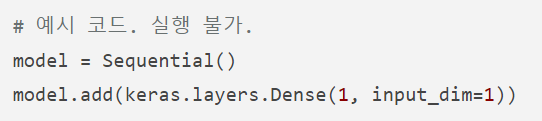

* x: 공부한 시간
* y: 공부한 시간에 따른 성적
* activation : linear (어떤 함수 사용할 거냐 의미)
* optimizer : sgd
* learning_rate : 0.01
* loss_func : mse
* epoch : 300

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model=Sequential()
model.add(Dense(1, input_dim=1, activation='linear')) #y의 차원은 1. 입력 x의 차원은 1. 함수는 linear

sgd=optimizers.SGD(lr=0.01)

model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(x,y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 321ms/step - loss: 4836.6655 - mse: 4836.6655
Epoch 2/300
1/1 [==============================] - 0s 11ms/step - loss: 596.2701 - mse: 596.2701
Epoch 3/300
1/1 [==============================] - 0s 12ms/step - loss: 74.5195 - mse: 74.5195
Epoch 4/300
1/1 [==============================] - 0s 12ms/step - loss: 10.3203 - mse: 10.3203
Epoch 5/300
1/1 [==============================] - 0s 12ms/step - loss: 2.4192 - mse: 2.4192
Epoch 6/300
1/1 [==============================] - 0s 11ms/step - loss: 1.4452 - mse: 1.4452
Epoch 7/300
1/1 [==============================] - 0s 11ms/step - loss: 1.3236 - mse: 1.3236
Epoch 8/300
1/1 [==============================] - 0s 11ms/step - loss: 1.3069 - mse: 1.3069
Epoch 9/300
1/1 [==============================] - 0s 13ms/step - loss: 1.3031 - mse: 1.3031
Epoch 10/300
1/1 [==============================] - 0s 12ms/step - loss: 1.3008 - mse: 1.3008
Epoch 11/300
1/1 [==============================] - 0s

1/1 [==============================] - 0s 63ms/step


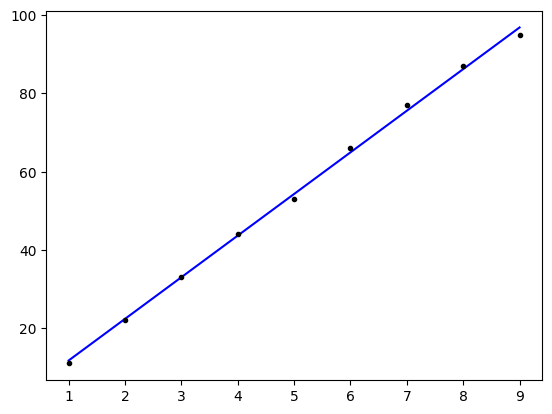

In [32]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')
# 두개의 데이터 시리즈를 같은 플롯에 그리는 코드
# x, model.predict(x) 는 b (blue)로
# x, y는 k (black)으로 그린

In [35]:
print(model.predict([9.5]))

1/1 [==============================] - 0s 69ms/step
[[102.12841]]


## 정리
* 선형회귀 구현 (텐서플로우, 케라스)
  * 케라스가 더 구현이 단순하다
* 흐름
  * x,y를 사용해 미분했을때 기울기가 0이 되도록 하는 최적의 w,b를 찾는다 (학습)
  * 손실함수를 구해서 이때의 손실함수가 최소가 되는 w,b를 구하면 된다. 이때 경사하강법을 사용
  * 경사하강법을 통해 w,b를 업데이트하고 나온 w,b를 사용해 input에 대한 output을 예측한다
